# Mental Health in Tech Project

## Data Sets

[OSMI Survey on Mental Health in the Tech Workplace in 2014](https://www.kaggle.com/osmi/mental-health-in-tech-survey) 

["Ongoing" OSMI survey from 2016](https://data.world/kittybot/osmi-mental-health-tech-2016)


## Questions

What factors are most signficant in influencing whether or not a person believes disclosing a mental health issue would have negative consequences?

Can we predict, based on publicly available features of a person and company, whether that person is likely to beleive disclosing a mental health issue would be harmful for their career?

## Plan

In [1]:
# clean 2014 data:
#   - remove invalid ages  ( < 16, > 80)
#   - create gender categories
#   - create dictionary to map questions to column names (from original data set)
#   - add year column with all 2014s

In [2]:
# use only US data

In [3]:
# plot number of responses by age

In [4]:
# plot frequency of mental health consequences yes/no/maybe by age

In [5]:
# plot frequency of mental health consequence yes/no/maybe by age groups (quantiles, 4-6 groups)

In [6]:
################ Logistic Regression

In [7]:
# logistic regression 
# - combine mental health consequences (yes and maybe) vs no as boolean categorical Y to predict
# - pull out X variables that are public
# - created dummies for categorical public X variables

## Setup

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# some plotting colors:
y = badass = '#BADA55'
m = '#444444'
n = 'b'
coffee = '#C0FFEE'

## Import & Initial Data Cleaning

In [9]:
# df14 = pd.read_csv('./datasets/2014/clean-no-dummies-2014.csv', index_col=0)
df14 = pd.read_csv('./datasets/2014/clean-mental-health-in-tech-2014.csv', index_col=0)
print df14.shape
df14.dropna(subset=['age'], inplace=True) 
print df14.shape

(1259, 183)
(1251, 183)


### Limit to US Data

In [10]:
df14 = df14[df14['country']=='United States']
print df14.shape
df14.head(3)

(746, 183)


,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,num_employees,...,phys_health_consequence_no,phys_health_consequence_yes,leave_dont_know,leave_somewhat_difficult,leave_somewhat_easy,leave_very_difficult,leave_very_easy,gender_category_female,gender_category_male,gender_category_other
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,0,1,often,6-25,...,1,0,0,0,1,0,0,1,0,0
1,2014-08-27 11:29:37,44.0,M,United States,IN,NaN,0,0,rarely,1000+,...,1,0,1,0,0,0,0,0,1,0
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,0,0,never,100-500,...,1,0,1,0,0,0,0,0,1,0


### Column-Question Mapping

Conveniently look up the survey question associated with each column name.

Can also add to the maps to describe created columns.

In [11]:
# map column names to questions
df14.cq = {'age': 'Age',
 'anonymity': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?',
 'benefits': 'Does your employer provide mental health benefits?',
 'care_options': 'Do you know the options for mental health care your employer provides?',
 'country': 'Country',
 'coworkers': 'Would you be willing to discuss a mental health issue with your coworkers?',
 'family_history': 'Do you have a family history of mental illness?',
 'gender': 'Gender',
 'leave': 'How easy is it for you to take medical leave for a mental health condition?',
 'mental_health_consequence': 'Do you think that discussing a mental health issue with your employer would have negative consequences?',
 'mental_health_interview': 'Would you bring up a mental health issue with a potential employer in an interview?',
 'mental_vs_physical': 'Do you feel that your employer takes mental health as seriously as physical health?',
 'num_employees': 'How many employees does your company or organization have?',
 'obs_consequence': 'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?',
 'phys_health_consequence': 'Do you think that discussing a physical health issue with your employer would have negative consequences?',
 'phys_health_interview': 'Would you bring up a physical health issue with a potential employer in an interview?',
 'remote_work': 'Do you work remotely (outside of an office) at least 50% of the time?',
 'seek_help': 'Does your employer provide resources to learn more about mental health issues and how to seek help?',
 'self_employed': 'Are you self-employed?',
 'state': 'If you live in the United States, which state or territory do you live in?',
 'supervisor': 'Would you be willing to discuss a mental health issue with your direct supervisor(s)?',
 'tech_company': 'Is your employer primarily a tech company/organization?',
 'timestamp': 'Timestamp',
 'treatment': 'Have you sought treatment for a mental health condition?',
 'wellness_program': 'Has your employer ever discussed mental health as part of an employee wellness program?',
 'work_interfere': 'If you have a mental health condition, do you feel that it interferes with your work?'
}

#### Additional Derived Columns

In [12]:
# gender_category_explanation = 'Derived column: categorized gender responses into male/female/other. Trans males and females are categorized as males and females, respectively.'
# df14.cq['gender_category'] = gender_category_explanation
df14.cq['gender_category'] = 'Derived: male/female/other. Trans male and trans female categorized as male and female, respectively.'

In [13]:
df14['year'] = 2014

#### Preview Column Function

In [14]:
# helper function to get column preview
def preview_col(col, data=df14):
    if col in data.cq:
        print data.cq[col]
    counts = data[col].value_counts(dropna=False)
    print counts
    percents = counts * (100.0/data.shape[0])
    print percents
    return percents

Have you sought treatment for a mental health condition?
1    408
0    338
Name: treatment, dtype: int64
1    54.691689
0    45.308311
Name: treatment, dtype: float64


/Users/bgveenstra/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:983: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


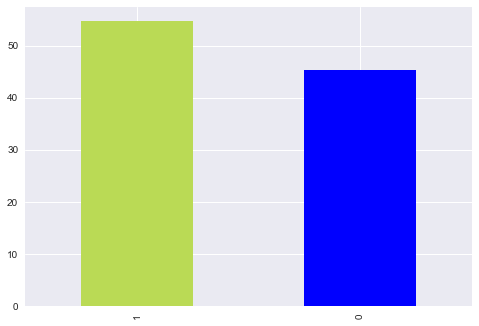

In [15]:
tps = preview_col('treatment')
tps.plot(kind='bar', colors=[y,n])

### Mental Health Consequences Boolean Column

Adding a column that will have 1 if the respondent answered `yes` or `maybe` for mental health consequence, and 0 if `no`.

Do you think that discussing a mental health issue with your employer would have negative consequences?
maybe    299
no       277
yes      170
Name: mental_health_consequence, dtype: int64
maybe    40.080429
no       37.131367
yes      22.788204
Name: mental_health_consequence, dtype: float64


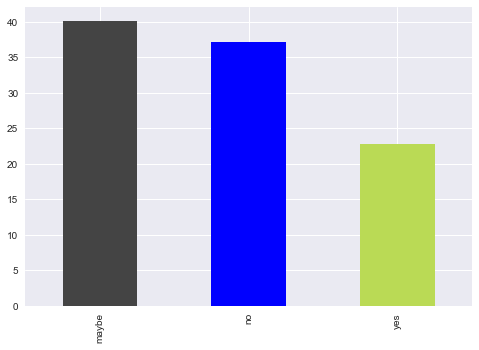

In [16]:
mhc = 'mental_health_consequence'
mhcp = preview_col(mhc)
mhcp.plot(kind='bar', colors=[m, n, y])

In [17]:
# from multiclass mental health consequence column, get a boolean column
mhc2 = 'mental_health_yes_maybe'

In [18]:
def ymn(ynmstr):
    if ynmstr == 'no':
        return 0
    else:
        return 1
df14['mental_health_yes_maybe'] = df14['mental_health_consequence'].map(lambda(x): ymn(x))

In [19]:
df14[mhc2].value_counts(dropna=False)

1    469
0    277
Name: mental_health_yes_maybe, dtype: int64

In [20]:
# df14[mhc].value_counts()

### Responses by age

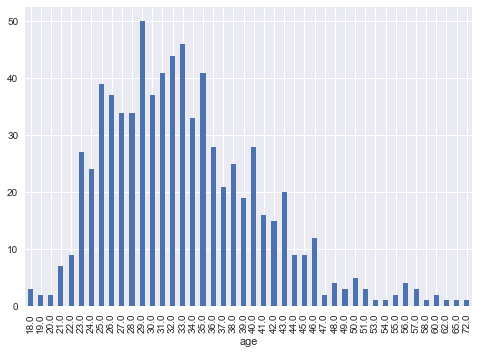

In [21]:
df14.groupby('age').size().plot(kind='bar')

In [22]:
df14.age.describe()

count    746.000000
mean      33.130027
std        7.647817
min       18.000000
25%       28.000000
50%       32.000000
75%       37.750000
max       72.000000
Name: age, dtype: float64

gender_category
female    184
male      557
other       5
dtype: int64


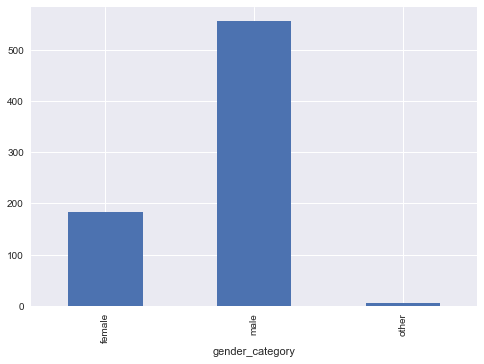

In [23]:
gcs = df14.groupby('gender_category')
gcs_size = gcs.size()
print gcs_size
gcs_size.plot(kind='bar')

In [24]:
def plot_percentages(df, category_col, target_col):
    for cat_val in df[category_col].unique():
        get_percentages_val(df, category_col, target_col, cat_val)
        
        
def get_percentages_val(df, category_col, target_col, cat_val):
    catdf = df[df[category_col]==cat_val]
    num_this_catval = catdf.shape[0]
    cat_target_groups = catdf.groupby(target_col)
    cat_target_sizes = cat_target_groups.size()
    print cat_target_sizes
    cat_target_percentages =  100 * cat_target_sizes / num_this_catval
    return cat_target_percentages
    
mp = get_percentages_val(df14, 'gender_category', mhc, 'male')
fp = get_percentages_val(df14, 'gender_category', mhc, 'female')
op = get_percentages_val(df14, 'gender_category', mhc, 'other')
op['no'] = 0.0
# print mp 
# print fp 
# print op

mental_health_consequence
maybe    214
no       226
yes      117
dtype: int64
mental_health_consequence
maybe    82
no       51
yes      51
dtype: int64
mental_health_consequence
maybe    3
yes      2
dtype: int64


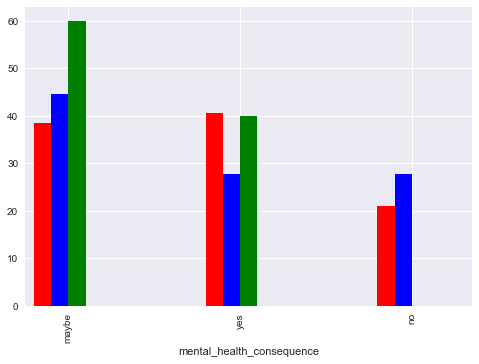

In [25]:
fig = plt.figure()

mp.plot(kind='bar', color='red', position=2, width=0.1)
fp.plot(kind='bar', color='blue', position=1, width=0.1)
op.plot(kind='bar', color='green', position=0, width=0.1)
fig.set_ylabel = ('percent')
plt.show()

In [26]:
# def cat_proportion_in_col(df, main, sub):
#     d = df[[main, sub]].copy()
#     count_subs_per_main = d.groupby([main, sub]).size()
#     percent_subs_per_main = count_subs_per_main.groupby(level=[0]).apply(lambda x: 100*x /  x.sum())
#     return percent_subs_per_main

# pros = cat_proportion_in_col(df14, 'gender_category', mhc)
# print 'no' in pros['other']
# pros[('other', 'no')] = 0 
# pros
def cat_proportion_in_col(df, main, sub):
    d = df[[main, sub]].copy()
    count_subs_per_main = d.groupby([main, sub]).size()
    percent_subs_per_main = count_subs_per_main.groupby(level=[0]).apply(lambda x: 100*x /  x.sum())
    pdf = pd.DataFrame(percent_subs_per_main)
    pdf.reset_index(inplace=True)
    pdf.rename(columns={0:'percentage'}, inplace=True)
    return pdf

pros = cat_proportion_in_col(df14, 'treatment', mhc)
pros

,treatment,mental_health_consequence,percentage
0,0,maybe,37.869822
1,0,no,44.674556
2,0,yes,17.455621
3,1,maybe,41.911765
4,1,no,30.882353
5,1,yes,27.205882


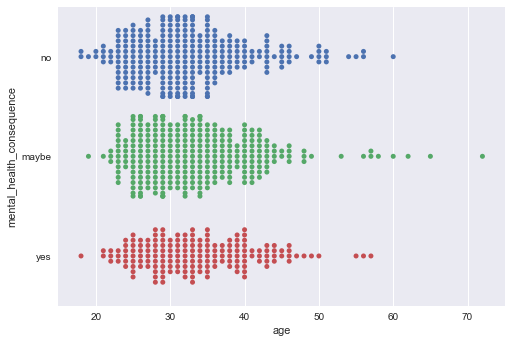

In [27]:
sns.swarmplot(y=mhc, x='age', data=df14)

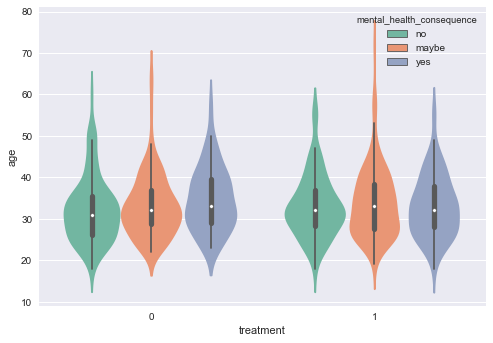

In [28]:
sns.violinplot(
    x='treatment', 
    y='age', 
    hue=mhc, 
    data=df14,         
    split=False, 
#     inner="stick", 
    palette="Set2"
);

In [29]:
def plot_percentage(df, main_col, sub_col):
    percent_df = cat_proportion_in_col(df, main_col, sub_col)
    print percent_df
    fg = sns.factorplot(
        x=mhc, 
        y='percentage',
        col=main_col,
        data=percent_df, 
        kind='bar',
        palette='Set1',
        order=['no', 'maybe', 'yes']
    )
    fg.set_xlabels('')
    fg.fig.subplots_adjust(top=0.84)
    fg.fig.suptitle('{0} response proportions by {1}'.format(sub_col, main_col))

   obs_consequence mental_health_consequence  percentage
0                0                     maybe   40.577508
1                0                        no   39.361702
2                0                       yes   20.060790
3                1                     maybe   36.363636
4                1                        no   20.454545
5                1                       yes   43.181818


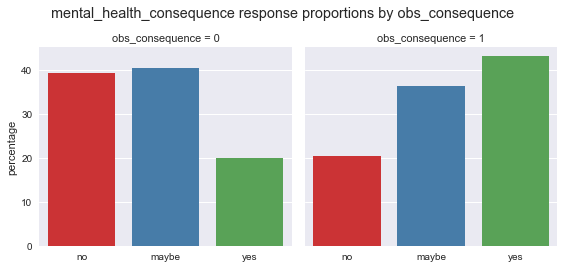

In [30]:
plot_percentage(df14, 'obs_consequence', mhc)

   treatment mental_health_consequence  percentage
0          0                     maybe   37.869822
1          0                        no   44.674556
2          0                       yes   17.455621
3          1                     maybe   41.911765
4          1                        no   30.882353
5          1                       yes   27.205882


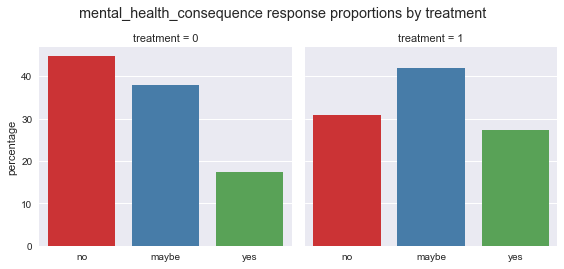

In [31]:
plot_percentage(df14, 'treatment', mhc)

   tech_company mental_health_consequence  percentage
0             0                     maybe   47.482014
1             0                        no   25.179856
2             0                       yes   27.338129
3             1                     maybe   38.385502
4             1                        no   39.868204
5             1                       yes   21.746293


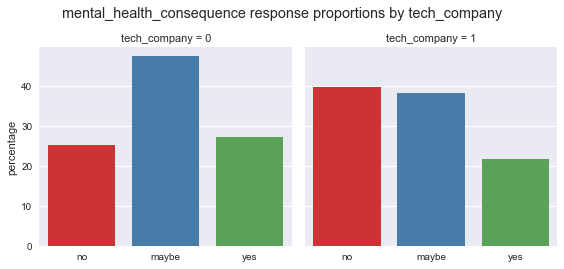

In [32]:
plot_percentage(df14, 'tech_company', mhc)

  gender_category mental_health_consequence  percentage
0          female                     maybe   44.565217
1          female                        no   27.717391
2          female                       yes   27.717391
3            male                     maybe   38.420108
4            male                        no   40.574506
5            male                       yes   21.005386
6           other                     maybe   60.000000
7           other                       yes   40.000000


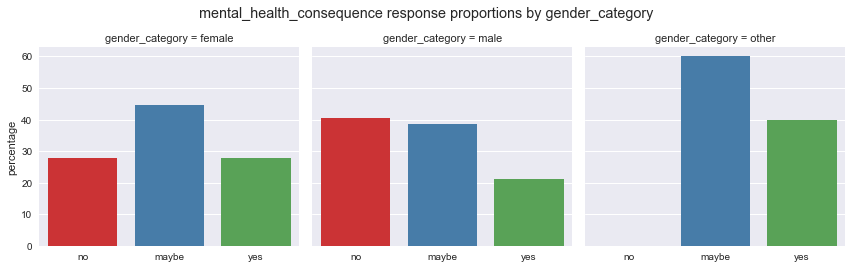

In [33]:
plot_percentage(df14, 'gender_category', mhc)

   work_interfere mental_health_consequence  percentage
0           never                     maybe   41.935484
1           never                        no   41.129032
2           never                       yes   16.935484
3           often                     maybe   37.500000
4           often                        no   26.250000
5           often                       yes   36.250000
6          rarely                     maybe   40.540541
7          rarely                        no   41.441441
8          rarely                       yes   18.018018
9       sometimes                     maybe   41.868512
10      sometimes                        no   29.411765
11      sometimes                       yes   28.719723


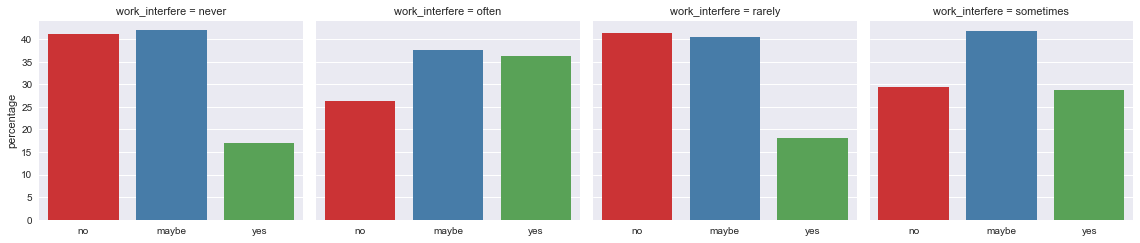

In [34]:
wi_df = cat_proportion_in_col(df14, 'work_interfere', mhc)
print wi_df
fg = sns.factorplot(
    x=mhc, 
    y='percentage',
    col='work_interfere',
    data=wi_df, 
    kind='bar',
    palette='Set1',
    order=['no', 'maybe', 'yes']
)
fg.set_xlabels('')
fg.fig.subplots_adjust(top=0.84)
# fg.fig.suptitle('{0} response proportions by {1}'.format(mhc, 'work_interfere'))

In [35]:
agec = df14['age'].value_counts()
agec = agec.sort_index()
agec

18.0     3
19.0     2
20.0     2
21.0     7
22.0     9
23.0    27
24.0    24
25.0    39
26.0    37
27.0    34
28.0    34
29.0    50
30.0    37
31.0    41
32.0    44
33.0    46
34.0    33
35.0    41
36.0    28
37.0    21
38.0    25
39.0    19
40.0    28
41.0    16
42.0    15
43.0    20
44.0     9
45.0     9
46.0    12
47.0     2
48.0     4
49.0     3
50.0     5
51.0     3
53.0     1
54.0     1
55.0     2
56.0     4
57.0     3
58.0     1
60.0     2
62.0     1
65.0     1
72.0     1
Name: age, dtype: int64

In [36]:
agey = df14.groupby('age')[mhc2].sum()
agey

age
18.0     1
19.0     1
20.0     0
21.0     3
22.0     6
23.0    15
24.0    12
25.0    26
26.0    25
27.0    19
28.0    27
29.0    32
30.0    20
31.0    21
32.0    27
33.0    25
34.0    25
35.0    23
36.0    17
37.0    14
38.0    17
39.0    13
40.0    22
41.0    13
42.0    13
43.0    12
44.0     8
45.0     4
46.0     8
47.0     1
48.0     4
49.0     2
50.0     1
51.0     0
53.0     1
54.0     0
55.0     1
56.0     2
57.0     3
58.0     1
60.0     1
62.0     1
65.0     1
72.0     1
Name: mental_health_yes_maybe, dtype: int64

In [37]:
agey[3:30,]

age
21.0     3
22.0     6
23.0    15
24.0    12
25.0    26
26.0    25
27.0    19
28.0    27
29.0    32
30.0    20
31.0    21
32.0    27
33.0    25
34.0    25
35.0    23
36.0    17
37.0    14
38.0    17
39.0    13
40.0    22
41.0    13
42.0    13
43.0    12
44.0     8
45.0     4
46.0     8
47.0     1
Name: mental_health_yes_maybe, dtype: int64

In [38]:
agep = 100.0 * agey[3:30,]/agec[3:30,]
agep

age
21.0    42.857143
22.0    66.666667
23.0    55.555556
24.0    50.000000
25.0    66.666667
26.0    67.567568
27.0    55.882353
28.0    79.411765
29.0    64.000000
30.0    54.054054
31.0    51.219512
32.0    61.363636
33.0    54.347826
34.0    75.757576
35.0    56.097561
36.0    60.714286
37.0    66.666667
38.0    68.000000
39.0    68.421053
40.0    78.571429
41.0    81.250000
42.0    86.666667
43.0    60.000000
44.0    88.888889
45.0    44.444444
46.0    66.666667
47.0    50.000000
dtype: float64

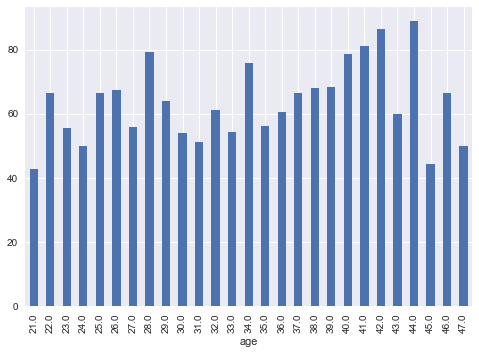

In [39]:
agep.plot(kind='bar')

In [40]:
nr = df14.shape[0]
bot20 = int(nr*.2)
bot20

149

In [41]:
bot40 = int(nr*.4)

In [42]:
quintiles = [int(nr*.2*i) for i in range(1, 6)]

In [43]:
quintiles

[149, 298, 447, 596, 746]

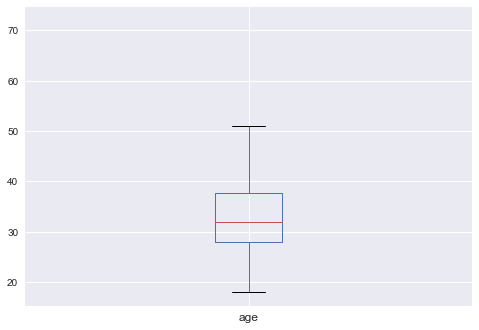

In [44]:
df14.boxplot(column='age')

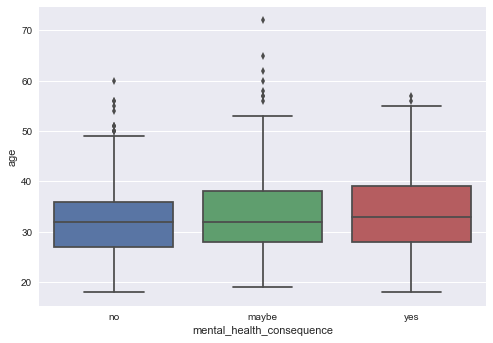

In [45]:
# ax = df14.boxplot(column='age')
# df14[df14[mhc]=='yes'].boxplot(column='age')
# df14[df14[mhc]=='maybe'].boxplot(column='age')
# df14[df14[mhc]=='no'].boxplot(column='age')
df14[[mhc, 'age']].groupby(mhc).describe()
# df

sns.boxplot(x=mhc, y='age', data=df14);

# a1=a[['kCH4_sync','week_days']]
# ax = a1.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
#                 showbox=True, showfliers=False, return_type='axes')
# a2 = a[['CH4_sync','week_days']]
# a2.boxplot(by='week_days', meanline=True, showmeans=True, showcaps=True, 
#            showbox=True, showfliers=False, ax=ax)

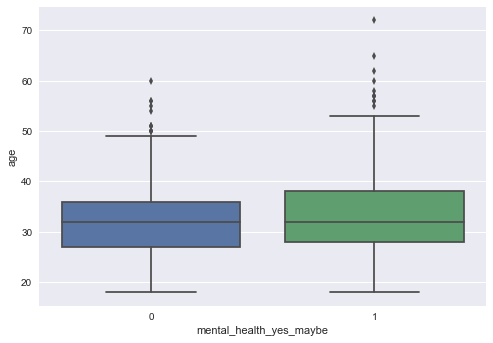

In [46]:

sns.boxplot(x=mhc2, y='age', data=df14);

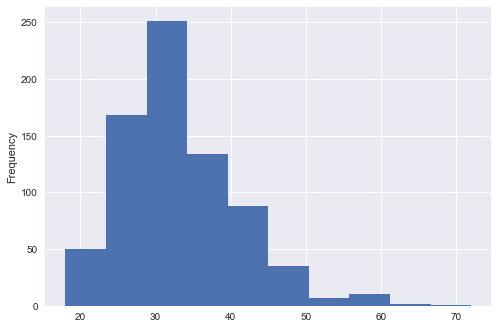

In [47]:

df14['age'].plot.hist()

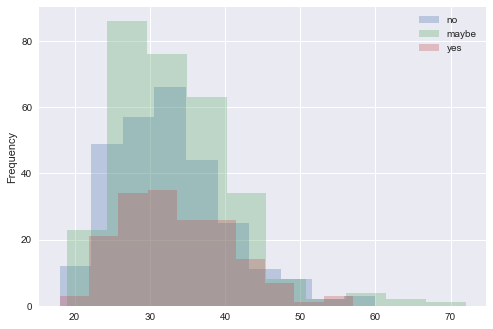

In [48]:
for r in df14[mhc].unique():
    df14[df14[mhc]==r]['age'].plot.hist(alpha=0.30, label=r, legend=True)

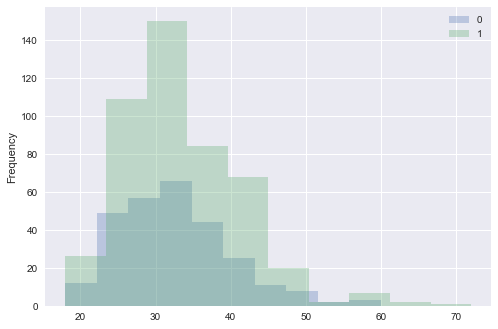

In [49]:
for r in df14[mhc2].unique():
    df14[df14[mhc2]==r]['age'].plot.hist(alpha=0.30, label=r, legend=True)

In [50]:
import statsmodels.stats.weightstats as sm
from scipy.stats import ttest_ind

mhc21age = df14[df14[mhc2]==1]['age'].dropna()
mhc20age = df14[df14[mhc2]==0]['age'].dropna()

# t-test, p-value, degrees of freedom
print sm.ttest_ind(mhc21age, mhc20age)


# print ttest_ind(mhc21age, mhc20age)

(1.7066119373900455, 0.088311491427256555, 744.0)


In [51]:
nd = df14[df14[mhc]=='no']['age'].dropna()
yd = df14[df14[mhc]=='yes']['age'].dropna()
md = df14[df14[mhc]=='maybe']['age'].dropna()

print sm.ttest_ind(nd, yd)
print sm.ttest_ind(nd, md)
print sm.ttest_ind(md, yd)

(-1.4736605887219922, 0.14128000918097555, 445.0)
(-1.4589503877689045, 0.14512575191946944, 574.0)
(-0.18127085042919486, 0.8562336311509211, 467.0)


In [52]:
gc = 'gender_category'
fc = df14[df14[gc]=='female'][mhc2].dropna()
mc = df14[df14[gc]=='male'][mhc2].dropna()
oc = df14[df14[gc]=='other'][mhc2].dropna()


print sm.ttest_ind(fc, mc)
print sm.ttest_ind(fc, oc)
print sm.ttest_ind(oc, mc)


(3.1418447643093153, 0.0017458612810267741, 739.0)
(-1.3773178339807441, 0.17006033348290231, 187.0)
(1.8443828724868256, 0.065655335071830398, 560.0)


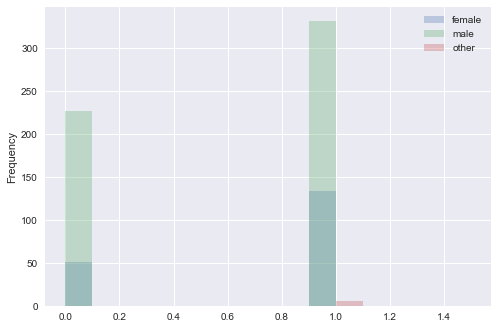

In [53]:
for r in df14[gc].unique():
    df14[df14[gc]==r][mhc2].plot.hist(alpha=0.30, label=r, legend=True)

(3.4707906703862466, 0.0005488586933082829, 744.0)


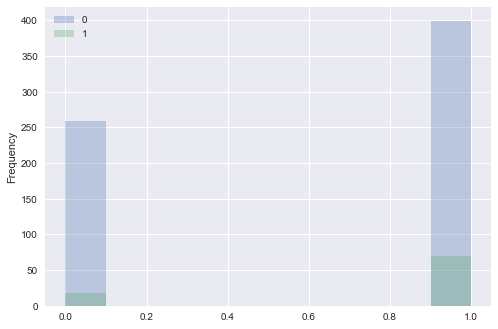

In [54]:
obc = 'obs_consequence'
obc1 = df14[df14[obc]==1][mhc2].dropna()
obc0 = df14[df14[obc]==0][mhc2].dropna()
print sm.ttest_ind(obc1, obc0)
for r in df14[obc].unique():
    df14[df14[obc]==r][mhc2].plot.hist(alpha=0.30, label=r, legend=True)

In [55]:
def onetwothree(x):
    if x=='yes':
        return 2
    elif x=='maybe':
        return 1
    else:
        return 0

df = df14.copy().dropna()
df['mhcnum'] = df[mhc].map(onetwothree)
df['mhcnum']


obc12 = df[df[obc]==1]['mhcnum'].dropna()
obc02 = df[df[obc]==0]['mhcnum'].dropna()
print sm.ttest_ind(obc12, obc02)

(2.2880222152035414, 0.02474313050525041, 81.0)


In [369]:
dms = []
for col in df14.columns:
    l = len(df14[col].unique())
    if l == 2:
#         print col
        if 0 in df14[col].unique():
            dms.append(col)
        else:
            print col

dms.remove(mhc+'_maybe')
dms.remove(mhc+'_no')
dms.remove(mhc+'_yes')
dms.remove(mhc2)
states = ['state_AL', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_NC', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'state_nan']         
states.remove('state_CA')            

seekhelp = ['seek_help_dont_know', 'seek_help_no', 'seek_help_yes']
seekhelp.remove('seek_help_no')

careopts = [ 'care_options_no', 'care_options_not_sure', 'care_options_yes']
careopts.remove('care_options_no')
interfere = ['work_interfere_never', 'work_interfere_often', 'work_interfere_rarely', 'work_interfere_sometimes', 'work_interfere_nan']
interfere.remove('work_interfere_never')

In [104]:
xcols = ['treatment'] + ['obs_consequence']  + seekhelp +  careopts #+ states 
X = df14[xcols]

In [105]:
X.head(3)

,treatment,obs_consequence,seek_help_dont_know,seek_help_yes,care_options_not_sure,care_options_yes
0,1,0,0,1,1,0
1,0,0,1,0,0,0
4,0,0,1,0,0,0


In [438]:
import statsmodels.discrete.discrete_model as discrete_model
y = df14[mhc2]

logit = discrete_model.Logit(y, X, missing='drop')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.635041
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     mental_health_yes_maybe   No. Observations:                  746
Model:                               Logit   Df Residuals:                      740
Method:                                MLE   Df Model:                            5
Date:                     Wed, 19 Apr 2017   Pseudo R-squ.:                 0.03731
Time:                             02:27:38   Log-Likelihood:                -473.74
converged:                            True   LL-Null:                       -492.10
                                             LLR p-value:                 6.820e-07
=========================================================================================
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
treatment                 0.7431      0.152      4.887      0.000         0.445     1.041
obs_consequence           0.9686      0.281      3.443      0.001         0.417     1.520
seek_help_dont_know       0.1593      0.165      0.969      0.333        -0.163     0.482
seek_help_yes            -0.5877      0.195     -3.011      0.003        -0.970    -0.205
care_options_not_sure     0.0698      0.185      0.378      0.706        -0.292     0.432
care_options_yes          0.0863      0.181      0.478      0.633        -0.268     0.441
=========================================================================================
"""

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
# from sklearn.metrics import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [211]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.7, stratify=y)

In [212]:

lr = LogisticRegression()
lrm = lr.fit(trainX, trainY)
print 'Intercept: \n', lr.intercept_
print 'Coefficients: \n', lr.coef_
probs = lr.predict_proba(testX)
# print 'Logreg predicted probabilities: \n',probs[:5,]
print 'Score: \n', lr.score(testX, testY)

Intercept: 
[ 0.33802784]
Coefficients: 
[[ 0.44492348  0.87526229  0.23055191 -0.60585704 -0.11375416 -0.03666286]]
Score: 
0.665178571429


In [213]:
pred = lr.predict(testX)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [214]:
cm = confusion_matrix(testY, pred)
                 # predicted mhc2==0   # predicted mhc2==1
# actual mhc2==0     12                   71
# actual mhc2==1      8                   133
cm

array([[ 12,  71],
       [  4, 137]])

In [215]:
print 'false pos / pos pred: ', float(cm[0][1])/(cm[1][1] + cm[0][1])
print 'true pos / pos pred: ', float(cm[1][1])/(cm[1][1] + cm[0][1])
print 'true pos / actual pos: ', float(cm[1][1])/(cm[1][1] + cm[1][0])
# high false positive rate

false pos / pos pred:  0.341346153846
true pos / pos pred:  0.658653846154
true pos / actual pos:  0.971631205674


In [218]:
# roc_curve(testY, probs[:,1])

In [217]:
roc_auc_score(testY,probs[:,1])

0.61702127659574468

In [456]:
def roc_auc( X, train_fraction=0.7):
#     print 'Columns: \n', X.columns.tolist()
    trainX, testX, trainY, testY = train_test_split(X, y, train_size=train_fraction, stratify=y)
    lr = LogisticRegression()
    lrm = lr.fit(trainX, trainY)
#     print 'Intercept: \n', lr.intercept_
#     print 'Coefficients: \n', lr.coef_
    probs = lr.predict_proba(testX)
    print 'Model Internal Score: \n', lr.score(testX, testY)
    pred = lr.predict(testX)
    cm = confusion_matrix(testY, pred)
    print 'Confusion Matrix: \n', cm
    roc_auc = roc_auc_score(testY,probs[:,1])
    print 'ROC AUC Score: \n',  roc_auc
    return {
        'confusion matrix': cm,
        'predictions': pred,
        'prediciton probabilities': probs,
        'lr': lr,
        'model': lrm,
        'roc auc score': roc_auc,
        'cols': X.columns
    }

In [457]:
# good coefficients & intercept
# Intercept: 
# [ 0.6256203]
# Coefficients: 
# [[ 0.22157059  0.49319513 -0.13146842 -0.62516122 -0.04497772 -0.14180665]]
# Model Internal Score: 
# 0.678571428571
# [[ 14  69]
#  [  3 138]]
# ROC AUC Score: 
# 0.700888661027

In [458]:
roc_auc(X)

Model Internal Score: 
0.638392857143
Confusion Matrix: 
[[ 13  70]
 [ 11 130]]
ROC AUC Score: 
0.55895924122


{'cols': Index([u'treatment', u'obs_consequence', u'seek_help_dont_know',
        u'seek_help_yes', u'care_options_not_sure', u'care_options_yes'],
       dtype='object'), 'confusion matrix': array([[ 13,  70],
        [ 11, 130]]), 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), 'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), 'prediciton probabilities': array([[ 0.42581378,  0.57418622],
        [ 0.16375755,  0.83624245],
        [ 0.28551104,  0.71448896],
        [ 0.42581378,  0.57418622],
        [ 0.27717977,  0.72282023],
       

In [459]:
# roc_auc(df14[['obs_consequence'] + careopts])

In [460]:
a = roc_auc(df14[dms])
# a['lr'].coef_[0][0]
dic = { dms[i]:a['lr'].coef_[0][i] for i in range(len(dms))}
adf = pd.DataFrame(dic, index=['Coefficient']).T
import math
adf['abs_coeff'] = adf['Coefficient'].map(math.fabs)
adf.sort_values('abs_coeff', inplace=True, ascending=False)
adf.head(10)

Model Internal Score: 
0.776785714286
Confusion Matrix: 
[[ 62  21]
 [ 29 112]]
ROC AUC Score: 
0.86208664445


,Coefficient,abs_coeff
phys_health_consequence_no,-1.944662,1.944662
phys_health_consequence_maybe,1.865746,1.865746
state_OR,-1.416050,1.416050
supervisor_no,1.295792,1.295792
mental_health_interview_no,1.167481,1.167481
supervisor_yes,-0.990875,0.990875
anonymity_no,0.956551,0.956551
coworkers_no,0.943160,0.943160
mental_health_interview_yes,-0.929873,0.929873
work_interfere_often,0.896359,0.896359


In [461]:
dms2 = [
    'family_history', 
    'treatment', 
    'remote_work', 
    'tech_company', 
    'obs_consequence', 
    'wellness_program_dont_know', 'wellness_program_no', 'wellness_program_yes', 
    'mental_vs_physical_dont_know', 'mental_vs_physical_no', 'mental_vs_physical_yes', 
    'benefits_dont_know', 'benefits_no', 'benefits_yes', 
    'num_employees_1-5', 'num_employees_100-500', 'num_employees_1000+', 'num_employees_26-100', 'num_employees_500-1000', 'num_employees_6-25', 
    'seek_help_dont_know', 'seek_help_no', 'seek_help_yes', 
#     'gender_female', 'gender_male', 'gender_other', 
    'work_interfere_never', 'work_interfere_often', 'work_interfere_rarely', 'work_interfere_sometimes', 'work_interfere_nan', 
    'care_options_no', 'care_options_not_sure', 'care_options_yes', 
#     'state_AL', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_NC', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'state_nan', 
    'phys_health_interview_maybe', 'phys_health_interview_no', 'phys_health_interview_yes', 
    'coworkers_no', 'coworkers_some_of_them', 'coworkers_yes', 
    'self_employed_no', 'self_employed_yes', 'self_employed_nan', 
    'anonymity_dont_know', 'anonymity_no', 'anonymity_yes', 
    'supervisor_no', 'supervisor_some_of_them', 'supervisor_yes', 
    'mental_health_interview_maybe', 'mental_health_interview_no', 'mental_health_interview_yes', 
    'phys_health_consequence_maybe', 'phys_health_consequence_no', 'phys_health_consequence_yes', 
    'leave_dont_know', 'leave_somewhat_difficult', 'leave_somewhat_easy', 'leave_very_difficult', 'leave_very_easy', 
    'gender_category_female', 'gender_category_male', 'gender_category_other'
]


In [462]:
a = roc_auc(df14[dms2])
# a['lr'].coef_[0][0]
dic = { dms2[i]:a['lr'].coef_[0][i] for i in range(len(dms2))}
adf = pd.DataFrame(dic, index=['Coefficient']).T
import math
adf['abs_coeff'] = adf['Coefficient'].map(math.fabs)
adf.sort_values('abs_coeff', inplace=True, ascending=False)
adf.head(10)

Model Internal Score: 
0.834821428571
Confusion Matrix: 
[[ 64  19]
 [ 18 123]]
ROC AUC Score: 
0.900965564385


,Coefficient,abs_coeff
phys_health_consequence_no,-1.951133,1.951133
phys_health_consequence_maybe,1.787543,1.787543
mental_health_interview_no,1.345585,1.345585
supervisor_no,1.094332,1.094332
mental_health_interview_yes,-1.083216,1.083216
supervisor_yes,-0.857681,0.857681
benefits_yes,0.815884,0.815884
leave_very_difficult,0.811416,0.811416
benefits_no,-0.791343,0.791343
mental_vs_physical_yes,-0.699460,0.699460


In [750]:
dmsco = [
    'family_history', 
    'treatment', 
    'remote_work', 
    'tech_company', 
    'obs_consequence', 
    'wellness_program_dont_know', 'wellness_program_no', #'wellness_program_yes', 
    'mental_vs_physical_dont_know', 'mental_vs_physical_no',# 'mental_vs_physical_yes', 
    'benefits_dont_know', 'benefits_no',  # 'benefits_yes', 
    'num_employees_1-5', 'num_employees_100-500', 'num_employees_1000+', 'num_employees_26-100', 'num_employees_500-1000',# 'num_employees_6-25', 
    'seek_help_dont_know', 'seek_help_no',# 'seek_help_yes', 
#     'gender_female', 'gender_male', 'gender_other', 
    'work_interfere_never', 'work_interfere_often', 'work_interfere_rarely', 'work_interfere_sometimes', #'work_interfere_nan', 
    'care_options_no', 'care_options_not_sure', #'care_options_yes', 
#     'state_AL', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_NC', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'state_nan', 
    'phys_health_interview_maybe', 'phys_health_interview_no', #'phys_health_interview_yes', 
    'coworkers_no', 'coworkers_some_of_them', #'coworkers_yes', 
    'self_employed_no', 'self_employed_yes', #'self_employed_nan', 
    'anonymity_dont_know', 'anonymity_no', #'anonymity_yes', 
    'supervisor_no', 'supervisor_some_of_them',# 'supervisor_yes', 
    'mental_health_interview_maybe', 'mental_health_interview_no', #'mental_health_interview_yes', 
    'phys_health_consequence_maybe', 'phys_health_consequence_no', #'phys_health_consequence_yes', 
#     'leave_dont_know', 
    'leave_somewhat_difficult', 'leave_somewhat_easy', 'leave_very_difficult', 'leave_very_easy', 
#     'gender_category_female', 'gender_category_male',# 'gender_category_other'
]

In [751]:
# a = roc_auc(df14[dmsco])
# # a['lr'].coef_[0][0]
# dic = { dmsco[i]:a['lr'].coef_[0][i] for i in range(len(dmsco))}
# adf = pd.DataFrame(dic, index=['Coefficient']).T
# import math
# adf['abs_coeff'] = adf['Coefficient'].map(math.fabs)
# adf.sort_values('abs_coeff', inplace=True, ascending=False)
# adf.head(10)

In [752]:
y = df14[mhc2]
X = df14[dmsco]
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.7, stratify=y)

logit = discrete_model.Logit(trainY, trainX, missing='drop')
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.322711
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     mental_health_yes_maybe   No. Observations:                  522
Model:                               Logit   Df Residuals:                      480
Method:                                MLE   Df Model:                           41
Date:                     Wed, 19 Apr 2017   Pseudo R-squ.:                  0.5109
Time:                             03:16:54   Log-Likelihood:                -168.46
converged:                            True   LL-Null:                       -344.43
                                             LLR p-value:                 4.779e-51
=================================================================================================
                                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
family_history                    0.2469      0.341      0.724      0.469        -0.422     0.915
treatment                         0.1165      0.459      0.254      0.799        -0.782     1.015
remote_work                       0.0380      0.348      0.109      0.913        -0.644     0.720
tech_company                      0.2298      0.370      0.620      0.535        -0.496     0.956
obs_consequence                   0.2064      0.511      0.404      0.686        -0.794     1.207
wellness_program_dont_know       -0.0948      0.520     -0.182      0.855        -1.114     0.924
wellness_program_no               0.1836      0.471      0.390      0.697        -0.740     1.107
mental_vs_physical_dont_know      0.8288      0.359      2.309      0.021         0.125     1.532
mental_vs_physical_no             1.2066      0.503      2.397      0.017         0.220     2.193
benefits_dont_know               -0.6997      0.414     -1.692      0.091        -1.510     0.111
benefits_no                      -0.8206      0.574     -1.429      0.153        -1.946     0.305
num_employees_1-5                 0.4714      0.767      0.615      0.539        -1.031     1.974
num_employees_100-500             0.6577      0.545      1.208      0.227        -0.410     1.725
num_employees_1000+               0.2496      0.512      0.487      0.626        -0.755     1.254
num_employees_26-100              0.2778      0.479      0.581      0.561        -0.660     1.216
num_employees_500-1000           -0.2165      0.772     -0.280      0.779        -1.730     1.297
seek_help_dont_know               0.3789      0.461      0.821      0.411        -0.525     1.283
seek_help_no                      0.3102      0.511      0.607      0.544        -0.691     1.312
work_interfere_never              0.7015      0.480      1.461      0.144        -0.240     1.643
work_interfere_often              0.6319      0.759      0.832      0.405        -0.856     2.120
work_interfere_rarely            -0.0975      0.569     -0.171      0.864        -1.214     1.019
work_interfere_sometimes          0.3289      0.559      0.589      0.556        -0.766     1.424
care_options_no                  -0.2778      0.428     -0.649      0.516        -1.117     0.561
care_options_not_sure            -0.8610      0.478     -1.800      0.072        -1.799     0.077
phys_health_interview_maybe      -1.5120      0.502     -3.014      0.003        -2.495    -0.529
phys_health_interview_no         -1.5591      0.508     -3.066      0.002        -2.556    -0.562
coworkers_no                      1.9634      0.665      2.952      0.003         0.660     3.267
coworkers_some_of_them            1.6445      0.497      3.311      0.001         0.671     2.618
self_employed_no                  0.8207      1.448      0.567      0.571        -2.018     3.659
self_employed_yes                -0.4811      1.687     -0.2

In [753]:
# reglogit = discrete_model.Logit(trainY, trainX, missing='drop')
# regresult = logit.fit_regularized(model='l1', alpha=.2)
# regresult.summary()

In [754]:
logit2 = discrete_model.Logit(testY, testX, missing='drop')
probs = logit2.predict(result.params)
pred = np.round(probs)
cm = confusion_matrix(testY, pred)
print 'Confusion Matrix: \n', cm
roc_auc = roc_auc_score(testY,probs)
print 'ROC AUC Score: \n',  roc_auc

Confusion Matrix: 
[[ 65  18]
 [ 18 123]]
ROC AUC Score: 
0.902332735196


In [755]:
print 'false pos / pos pred: ', float(cm[0][1])/(cm[1][1] + cm[0][1])
print 'true pos / pos pred: ', float(cm[1][1])/(cm[1][1] + cm[0][1])
print 'true pos / actual pos: ', float(cm[1][1])/(cm[1][1] + cm[1][0])

false pos / pos pred:  0.127659574468
true pos / pos pred:  0.872340425532
true pos / actual pos:  0.872340425532
